In [1]:
import ftm
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt
import time


getsounds_imp is the impulse implementation

getsounds_dif is the impulse-invariant implementation (difference eq version)

In [2]:
w11=300 * 2 * np.pi #range 200hz-1200hz
tau11 = 0.09 #range 0.01-0.3
p = 0.3 #how round the sound is, smaller the rougher(metal), range 0-0.3
D = 0.3 #inharmonicity in smaller values, range 0-10
alpha = 1 #range 0-5
sr = 44100
start_time = time.time()
y = ftm.getsounds_imp(10,10,w11,tau11,p,D,alpha,sr)
print("--- %s seconds ---" % (time.time() - start_time))
ipd.Audio(y,rate=sr)

--- 2.2650229930877686 seconds ---


In [5]:
start_time = time.time()
y_dif = ftm.getsounds_dif(10,10,w11,tau11,p,D,alpha,sr)
print("--- %s seconds ---" % (time.time() - start_time))
ipd.Audio(y_dif,rate=sr)

--- 2.107487916946411 seconds ---


In [3]:
start_time = time.time()
y_bil = ftm.getsounds_bil(10,10,w11,tau11,p,D,alpha,sr)
print("--- %s seconds ---" % (time.time() - start_time))
ipd.Audio(y_bil,rate=sr)

--- 1.6688942909240723 seconds ---


In [4]:
start_time = time.time()
y_bil2 = ftm.getsounds_bil(10,10,w11*2,tau11,p*2,D,alpha*0.8,sr)
print("--- %s seconds ---" % (time.time() - start_time))
ipd.Audio(y_bil2,rate=sr)

--- 1.7730438709259033 seconds ---


In [15]:
w11 = np.array([100,200,300,400,600,800])*2*np.pi
tau = np.array([0.01,0.03,0.1,0.2,0.3])
for t in tau:
    y_bil = ftm.getsounds_bil(10,10,w11[0],t,p*2,D,alpha*0.8,sr)
    print(np.argmax(y_bil),max(y_bil))

5 5.15102341992946e-08
5 6.249654089939531e-08
5 6.703553677730696e-08
5 6.805924167573732e-08
5 6.840456995870839e-08


In [16]:
w11 = np.array([100,200,300,400,600,800])*2*np.pi
tau = np.array([0.01,0.03,0.1,0.2,0.3])
for w in w11:
    y_bil = ftm.getsounds_bil(10,10,w,tau[0],p*2,D,alpha*0.8,sr)
    print(np.argmax(y_bil),max(y_bil))

5 5.15102341992946e-08
3 2.9071741376357634e-08
3 1.9427733421822283e-08
2 1.4307026693894316e-08
2 9.947956911695964e-09
2 7.940879689625518e-09


In [8]:
np.sum(np.array(y)-np.array(y_dif))

-0.05026846332619477

problems:
1. these synthesis yield really small values, ipd normalizes it automatically, but c++ does not
2. impulse implementation is faster than difference implementation, why
3. two implementations yield slightly different sounds, dif version is sharper.

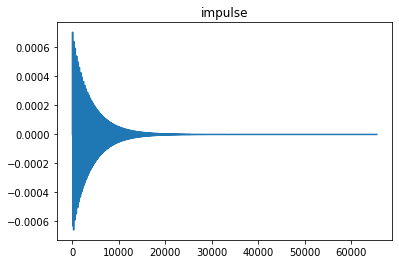

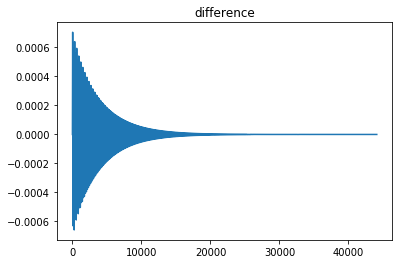

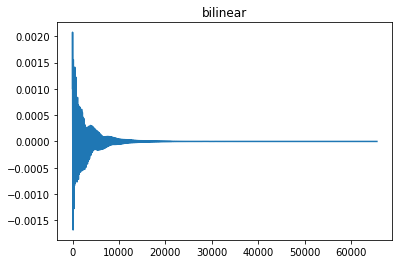

In [6]:
plt.plot(range(len(y)),y)
plt.title('impulse')
plt.figure(2)
plt.plot(range(len(y_dif)),y_dif)
plt.title('difference')
plt.figure(3)
plt.plot(range(len(y_bil)),y_bil)
plt.title('bilinear')
plt.show()